In [30]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn import metrics
from sklearn.model_selection import KFold

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
from data_utils import load_train, load_test, write_test

In [5]:
X_train, y_train = load_train('data/train_2008.csv')

In [16]:
X_train.shape, y_train.shape

((64667, 366), (64667,))

In [19]:
y_train[y_train == 1] = -1
y_train[y_train == 2] = 1

In [20]:
y_train

array([-1, -1, -1, ..., -1, -1, -1])

In [21]:
def evaluate_model(clf, train, test):
    X_train, y_train = zip(*train)
    #Fit the algorithm on the data
    clf.fit(X_train, y_train, eval_metric='auc')
    
    y_train_pred = clf.predict(X_train)
    
    X_test, y_test = zip(*test)
    y_test_pred = clf.predict(X_test)
    
    #Print model report:
    print "Model Report"
    print "Accuracy (Train): %f" % metrics.accuracy_score(y_train, y_train_pred)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_train_pred)
    
    print "\nAccuracy (Test): %f" % metrics.accuracy_score(y_test, y_test_pred)
    print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_test_pred)

## Find the right size for each tree estimator

In [32]:
param_test_1 = {
    'criterion':['entropy'],
    'n_estimators': [100],
    'max_depth': range(3, 20, 1)
}

gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_jobs=4, max_features=None), 
                        param_grid=param_test_1,
                        scoring='roc_auc', verbose=2)

gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 17 candidates, totalling 51 fits
[CV] n_estimators=100, criterion=entropy, max_depth=3 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=3, total=  18.9s
[CV] n_estimators=100, criterion=entropy, max_depth=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s


[CV] . n_estimators=100, criterion=entropy, max_depth=3, total=  18.7s
[CV] n_estimators=100, criterion=entropy, max_depth=3 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=3, total=  18.8s
[CV] n_estimators=100, criterion=entropy, max_depth=4 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=4, total=  24.5s
[CV] n_estimators=100, criterion=entropy, max_depth=4 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=4, total=  25.2s
[CV] n_estimators=100, criterion=entropy, max_depth=4 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=4, total=  24.7s
[CV] n_estimators=100, criterion=entropy, max_depth=5 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=5, total=  29.9s
[CV] n_estimators=100, criterion=entropy, max_depth=5 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=5, total=  30.1s
[CV] n_estimators=100, criterion=entropy, max_depth=5 ................
[CV] .

[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed: 44.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [41]:
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch1.best_params_
print gsearch1.best_score_

0.739 (+/-0.006) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3}
0.751 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 4}
0.759 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5}
0.765 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 6}
0.769 (+/-0.002) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 7}
0.772 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 8}
0.775 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 9}
0.776 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10}
0.777 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 11}
0.778 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 12}
0.778 (+/-0.004) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 13}
0.778 (+/-0.005) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 14}

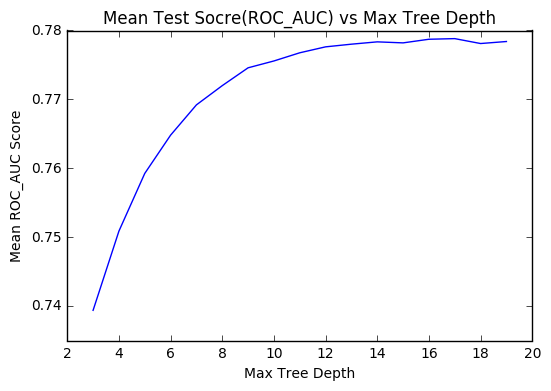

In [44]:
xs = range(3, 20, 1)
ys = gsearch1.cv_results_['mean_test_score']
plt.plot(xs,ys)
plt.title("Mean Test Socre(ROC_AUC) vs Max Tree Depth")
plt.ylabel("Mean ROC_AUC Score")
plt.xlabel("Max Tree Depth")
plt.savefig("plots/rf_depth.png")

In [ ]:
param_test_2 = {
    'criterion':['entropy'],
    'n_estimators': [100],
    'max_features': range(0.1, 1, 0.1)
}

gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_jobs=4, max_depth=17), 
                        param_grid=param_test_1,
                        scoring='roc_auc', verbose=2)

gsearch1.fit(X_train, y_train)